<a href="https://colab.research.google.com/github/caua-sathler/NEURAL-NETWORKS/blob/main/MPL_Adam_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [6]:
import torch  # PyTorch's core library for working with Tensors
import torch.nn as nn  # Sub-library containing classes and methods for building neural networks, such as layers and activation functions
import torch.optim as optim  # Sub-library with optimization algorithms like Adam, RMSprop, and Momentum
import torch.nn.functional as F  # Sub-library providing functions for operations like activation functions and loss calculations

In [7]:
from sklearn import datasets  # Collection of datasets available in Scikit-Learn for machine learning tasks
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Method for normalizing data to ensure all features are on the same scale (usually between 0 and 1)

In [8]:
import numpy as np  # Library for numerical computations, including arrays and mathematical operations
import matplotlib.pyplot as plt  # Library for creating visualizations and graphs

In [9]:
iris = datasets.load_iris() # Load dataset Iris. Classification. 150 instances, 4 features and 3 classes.
X = iris.data # X receives all features of each flower
y = iris.target # y receives all classes of each flower

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Spliting data: 20% to test and 80% to training

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Transforming data in tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [10]:
class MLP(nn.Module): # Class MLP heritage from Module
  def __init__(self, input_dim, output_dim): # Constructor. 'self' in Python is similar to 'this' in C++.
    super(MLP, self).__init__() # Call Module constructor first to guarantee initialization
    # Defining each layer: type and number of neurons
    self.fc1 = nn.Linear(input_dim, 16)
    self.fc2 = nn.Linear(16, 8)
    self.fc3 = nn.Linear(8, 8)
    self.fc4 = nn.Linear(8, output_dim)

    # Defining each activation function
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x) # No activation function
    return x

In [11]:
model = MLP(input_dim=4, output_dim=3) # Defining dimensions of input and output

criterion = nn.CrossEntropyLoss() # Defining loss function. Cross Entropy applies Softmax automatically
optimizer = optim.Adam(model.parameters(), lr=0.007) # Defining Adam and the learning rate

In [22]:
epochs = 120  # Total number of training epochs
batch_size = 16  # Number of samples per batch

for epoch in range(epochs):  # Main training loop (iterates through epochs)
    model.train()  # Set the model to training mode (activates dropout, batch normalization, etc.)

    # Shuffle the training data at the start of each epoch
    indices = torch.randperm(X_train.shape[0])
    X_train = X_train[indices]
    y_train = y_train[indices]

    # Iterate over mini-batches
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]  # Select the current batch of input features
        y_batch = y_train[i:i+batch_size]  # Select the corresponding labels for the batch

        optimizer.zero_grad()  # Reset gradients to zero (PyTorch accumulates them by default)
        outputs = model(X_batch)  # Forward pass: compute model predictions for the batch
        loss = criterion(outputs, y_batch)  # Compute the loss (difference between predictions and actual labels)
        loss.backward()  # Backpropagation: compute gradients of loss with respect to model parameters
        optimizer.step()  # Update model parameters using the computed gradients

    # Print loss every 10 epochs for monitoring training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')


Epoch 10/120, Loss: 0.0801
Epoch 20/120, Loss: 0.0025
Epoch 30/120, Loss: 0.0017
Epoch 40/120, Loss: 0.0009
Epoch 50/120, Loss: 0.0014
Epoch 60/120, Loss: 0.0002
Epoch 70/120, Loss: 0.0015
Epoch 80/120, Loss: 0.2244
Epoch 90/120, Loss: 0.0073
Epoch 100/120, Loss: 0.0011
Epoch 110/120, Loss: 0.0097
Epoch 120/120, Loss: 0.0094


**Dropout:** A technique to prevent overfitting.

**`->`** Randomly "drops" (deactivates) a fraction of neurons during training, forcing the network to not rely too much on specific neurons, improving generalization.

**Batch Normalization (BatchNorm):** A technique to normalize layer outputs to have zero mean and unit variance.

**`->`** Normalizes activations for each mini-batch during training and uses fixed statistics during evaluation. It stabilizes and speeds up training, reduces dependency on weight initialization, and acts as a mild regularizer.

In [23]:
model.eval()  # Set the model to evaluation mode (disables dropout, batch normalization, etc.)

with torch.no_grad():  # Disable gradient calculation (reduces memory usage and speeds up inference)
    outputs = model(X_test)  # Forward pass: get model predictions for the test set
    predictions = torch.argmax(outputs, dim=1)  # Select the class with the highest probability for each sample
    accuracy = (predictions == y_test).float().mean()  # Compute accuracy as the percentage of correct predictions
    print(f'Test set accuracy: {accuracy.item() * 100:.2f}%')  # Display accuracy


Test set accuracy: 100.00%


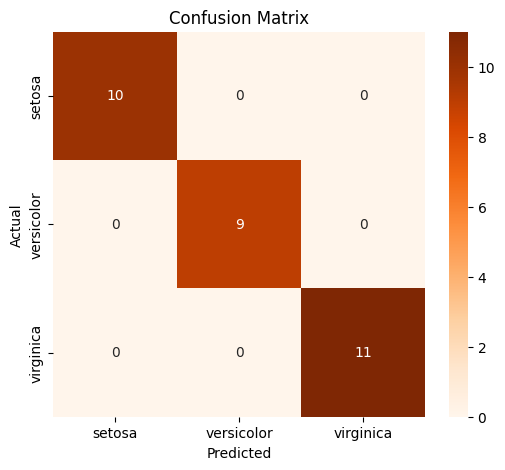

In [25]:
from sklearn.metrics import confusion_matrix  # Import function to compute the confusion matrix
import seaborn as sns  # Import Seaborn for visualization

model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    outputs = model(X_test)
    predictions = torch.argmax(outputs, dim=1).numpy()

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test.numpy(), predictions)

# Plot the confusion matrix
plt.figure(figsize=(6,5))  # Set figure size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",  # Create heatmap with annotation
            xticklabels=iris.target_names, yticklabels=iris.target_names)  # Label axes with class names
plt.xlabel("Predicted")  # Label for x-axis
plt.ylabel("Actual")  # Label for y-axis
plt.title("Confusion Matrix")  # Title for the plot
plt.show()  # Display the plot
